In [2]:
import pandas as pd

df = pd.read_csv('placement.csv')
df

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0
...,...,...,...
95,4.3,200,0
96,4.4,42,0
97,6.7,182,1
98,6.3,103,1


In [3]:
df.head()
df.tail()
df.describe()
df.shape
df.info()
df.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    int64  
 2   placement  100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


,cgpa,iq,placement
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
95,False,False,False
96,False,False,False
97,False,False,False
98,False,False,False


In [4]:
df.isnull().sum()
df.dropna()
df.drop('cgpa',axis=1) # drop used for delete column from dataframe



,iq,placement
0,123,1
1,106,0
2,121,0
3,132,1
4,142,0
...,...,...
95,200,0
96,42,0
97,182,1
98,103,1


Text(0.5, 1.0, 'Student Data')

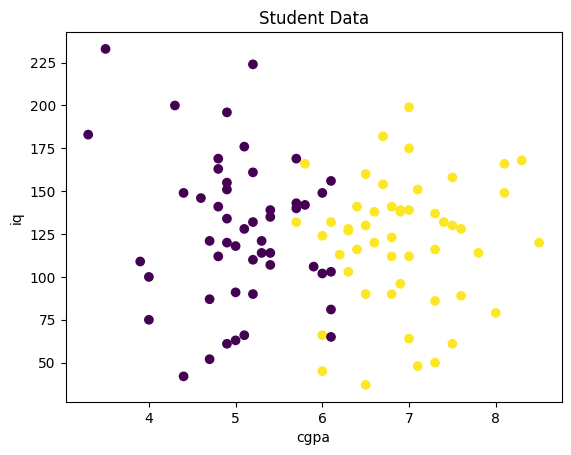

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

plt.xlabel('cgpa')
plt.ylabel('iq')
plt.title('Student Data')

In [6]:
# extract input and output column
x= df.iloc[ : ,0:2]
y= df.iloc[ : ,-1]
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [7]:
#data split into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2 , random_state=42)
x_train

,cgpa,iq
55,7.8,114
88,4.4,149
26,7.0,199
42,7.6,89
69,8.5,120
...,...,...
60,6.9,139
71,6.1,132
14,6.1,103
92,5.2,110


In [8]:
y_train

,placement
55,1
88,0
26,1
42,1
69,1
...,...
60,1
71,1
14,0
92,0


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)


array([[ 1.36840833,  0.10949567],
       [ 2.09339288,  1.07995296],
       [ 0.28093151,  0.03288063],
       [ 0.00906231, -1.5249587 ],
       [ 1.36840833, -1.65265045],
       [-1.25966065,  0.51810927],
       [-0.98779145, -0.14588782],
       [-0.98779145,  1.79502675],
       [ 0.00906231, -2.06126404],
       [ 0.73404686, -0.06927277],
       [-1.80339906, -0.65665481],
       [ 1.4590314 ,  0.05841897],
       [-0.98779145, -1.65265045],
       [ 0.00906231,  0.59472432],
       [ 1.1871622 , -1.01419171],
       [-0.17218383,  0.41595587],
       [-0.98779145,  0.74795441],
       [ 1.1871622 , -1.93357229],
       [-0.5346761 ,  0.33934082],
       [-1.89402213, -0.42680967]])

In [10]:
# model training
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [11]:
#evaluate/Test model
pred=model.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.85

In [13]:
#save model in file
import pickle

pickle.dump(model, open("model.pkl", "wb"))
